# **Question 1: Cloud Computing for Deep Learning (20 points)**

Cloud computing offers significant advantages for deep learning applications.

(a) Define elasticity and scalability in the context of cloud computing for deep learning. (10 points)

(b) Compare AWS SageMaker, Google Vertex AI, and Microsoft Azure Machine Learning Studio in terms of their deep learning capabilities. (10 points)

**Expected Output**

Write the definition and comparison for (a) and (b). No code needed.

## **Answer:**

## (a) Elasticity and Scalability in Cloud Computing for Deep Learning

**Elasticity** refers to a cloud system's ability to dynamically and automatically adjust resources (like computing power, memory, or storage) in response to changing workload demands in real-time. For deep learning applications, elasticity means that computational resources can automatically scale up during intensive training phases and scale down during periods of lower activity or when inference is the primary task, optimizing both performance and cost efficiency.

**Scalability** refers to a system's ability to handle growing amounts of work by adding resources to the system. In cloud computing for deep learning, scalability allows practitioners to expand their infrastructure capacity in two primary ways:
- Vertical scalability (scaling up): Upgrading to more powerful machines with better GPUs/TPUs, more memory, or faster processors
- Horizontal scalability (scaling out): Adding more machines to distribute the workload across multiple servers, enabling parallel processing for tasks like distributed training

## (b) Comparison of Deep Learning Cloud Platforms

### AWS SageMaker
- **Model Development**: Provides Jupiter notebooks with pre-configured environments for popular frameworks (TensorFlow, PyTorch, MXNet)
- **Training Optimization**: Features distributed training, automatic model tuning, and managed spot training for cost optimization
- **Deployment Strengths**: Offers serverless inference, multi-model endpoints, and batch transform for various deployment scenarios
- **Unique Features**: SageMaker Neo for model optimization across various hardware, SageMaker Debugger for training visibility, and built-in algorithms

### Google Vertex AI
- **Model Development**: Integrates with Google Colab and offers AutoML capabilities for users with less ML expertise
- **Training Optimization**: Features TPU support for accelerated training and seamless integration with TensorFlow
- **Deployment Strengths**: Provides scalable online prediction services with monitoring and explainability features
- **Unique Features**: Deep integration with Google's TPU infrastructure, Vizier for hyperparameter tuning, and Feature Store for feature management

### Microsoft Azure Machine Learning Studio
- **Model Development**: Offers a drag-and-drop interface alongside code-first options for varied skill levels
- **Training Optimization**: Provides automated ML, hyperparameter tuning, and distributed training on GPU clusters
- **Deployment Strengths**: Supports deployment to various targets including Azure Kubernetes Service, IoT Edge devices, and Azure Functions
- **Unique Features**: Integration with Azure DevOps for MLOps, interpretability tools, and ONNX compatibility for framework interoperability.























# **Question 2: Convolution Operations with Different Parameters (20 points)**

## **Task :** Implement Convolution with Different Stride and Padding (10 points)

Write a Python script using NumPy and TensorFlow/Keras to perform convolution on a 5×5 input matrix using a 3×3 kernel with varying parameters.

1. Define the following 5×5 input matrix:

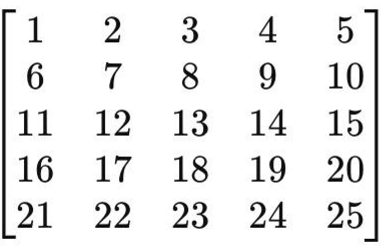


2. Define the following 3×3 kernel:

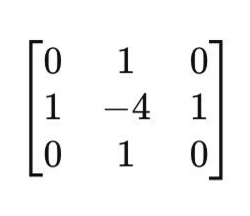
3. Perform convolution operations with:

*  Stride = 1, Padding = ‘VALID’
*  Stride = 1, Padding = ‘SAME’
*  Stride = 2, Padding = ‘VALID’
*  Stride = 2, Padding = ‘SAME’

4. Print the output feature maps for each case.

**Expected Output**

Print the output feature maps for

*  Stride = 1, Padding = ‘VALID’
*  Stride = 1, Padding = ‘SAME’
*  Stride = 2, Padding = ‘VALID’
*  Stride = 2, Padding = ‘SAME’


In [2]:
import numpy as np
import tensorflow as tf

# Define the 5x5 input matrix as specified in the assignment
input_matrix = np.array([
    [1, 2, 3, 4, 5],
    [6, 7, 8, 9, 10],
    [11, 12, 13, 14, 15],
    [16, 17, 18, 19, 20],
    [21, 22, 23, 24, 25]
], dtype=np.float32)

# Define the 3x3 kernel as specified in the assignment
kernel = np.array([
    [0, 1, 0],
    [1, -4, 1],
    [0, 1, 0]
], dtype=np.float32)

print("Input Matrix:")
print(input_matrix)
print("\nKernel:")
print(kernel)

# Reshape the input to match TensorFlow's expected format [batch_size, height, width, channels]
input_tensor = tf.reshape(input_matrix, [1, 5, 5, 1])

# Reshape the kernel to match TensorFlow's expected format [height, width, in_channels, out_channels]
kernel_tensor = tf.reshape(kernel, [3, 3, 1, 1])

# Case 1: Stride = 1, Padding = 'VALID'
conv1 = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, 1, 1, 1], padding='VALID')
output1 = tf.squeeze(conv1).numpy()

# Case 2: Stride = 1, Padding = 'SAME'
conv2 = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, 1, 1, 1], padding='SAME')
output2 = tf.squeeze(conv2).numpy()

# Case 3: Stride = 2, Padding = 'VALID'
conv3 = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, 2, 2, 1], padding='VALID')
output3 = tf.squeeze(conv3).numpy()

# Case 4: Stride = 2, Padding = 'SAME'
conv4 = tf.nn.conv2d(input_tensor, kernel_tensor, strides=[1, 2, 2, 1], padding='SAME')
output4 = tf.squeeze(conv4).numpy()

# Print results with clear formatting
print("\n==== Convolution Results ====")
print("\nOutput for Stride = 1, Padding = 'VALID':")
print(output1)

print("\nOutput for Stride = 1, Padding = 'SAME':")
print(output2)

print("\nOutput for Stride = 2, Padding = 'VALID':")
print(output3)

print("\nOutput for Stride = 2, Padding = 'SAME':")
print(output4)

# Optional: Manual calculation for verification (for case 1)
def manual_convolution(input_matrix, kernel, stride=1, padding='VALID'):
    """
    Manually perform convolution operation
    """
    in_h, in_w = input_matrix.shape
    k_h, k_w = kernel.shape

    # Handle padding
    if padding == 'VALID':
        pad_h, pad_w = 0, 0
        padded_input = input_matrix
    elif padding == 'SAME':
        pad_h = max(0, (in_h - 1) * stride + k_h - in_h) // 2
        pad_w = max(0, (in_w - 1) * stride + k_w - in_w) // 2
        padded_input = np.pad(input_matrix, ((pad_h, pad_h), (pad_w, pad_w)), 'constant')

    # Calculate output dimensions
    out_h = (padded_input.shape[0] - k_h) // stride + 1
    out_w = (padded_input.shape[1] - k_w) // stride + 1

    # Initialize output
    output = np.zeros((out_h, out_w))

    # Perform convolution
    for i in range(out_h):
        for j in range(out_w):
            h_start = i * stride
            h_end = h_start + k_h
            w_start = j * stride
            w_end = w_start + k_w

            # Element-wise multiplication and sum
            output[i, j] = np.sum(padded_input[h_start:h_end, w_start:w_end] * kernel)

    return output

# Verify case 1 with manual calculation
print("\n==== Verification ====")
print("\nManual calculation for Stride = 1, Padding = 'VALID':")
manual_output = manual_convolution(input_matrix, kernel)
print(manual_output)

Input Matrix:
[[ 1.  2.  3.  4.  5.]
 [ 6.  7.  8.  9. 10.]
 [11. 12. 13. 14. 15.]
 [16. 17. 18. 19. 20.]
 [21. 22. 23. 24. 25.]]

Kernel:
[[ 0.  1.  0.]
 [ 1. -4.  1.]
 [ 0.  1.  0.]]

==== Convolution Results ====

Output for Stride = 1, Padding = 'VALID':
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]

Output for Stride = 1, Padding = 'SAME':
[[  4.   3.   2.   1.  -6.]
 [ -5.   0.   0.   0. -11.]
 [-10.   0.   0.   0. -16.]
 [-15.   0.   0.   0. -21.]
 [-46. -27. -28. -29. -56.]]

Output for Stride = 2, Padding = 'VALID':
[[0. 0.]
 [0. 0.]]

Output for Stride = 2, Padding = 'SAME':
[[  4.   2.  -6.]
 [-10.   0. -16.]
 [-46. -28. -56.]]

==== Verification ====

Manual calculation for Stride = 1, Padding = 'VALID':
[[0. 0. 0.]
 [0. 0. 0.]
 [0. 0. 0.]]


# **Question 3: CNN Feature Extraction with Filters and Pooling (30 points)**
## **Task 1: Implement Edge Detection Using Convolution (15 points)**

Write a Python script using NumPy and OpenCV (cv2) to apply edge detection on an image using a Sobel filter.

*  Load a grayscale image (you can use any sample image).
*  Apply the Sobel filter for edge detection in the x-direction and y-direction.
*  Display the original image and the filtered images.

Use the following Sobel filters:

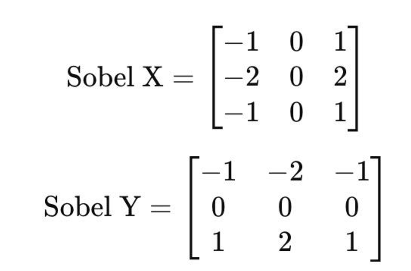

**Expected Output**

Task1: Edge Detection using Sobel Filter

Display three images:

* Original Image
* Edge detection using Sobel-X
* Edge detection using Sobel-Y



Task 1: Edge Detection Using Sobel Filter
Creating sample image...


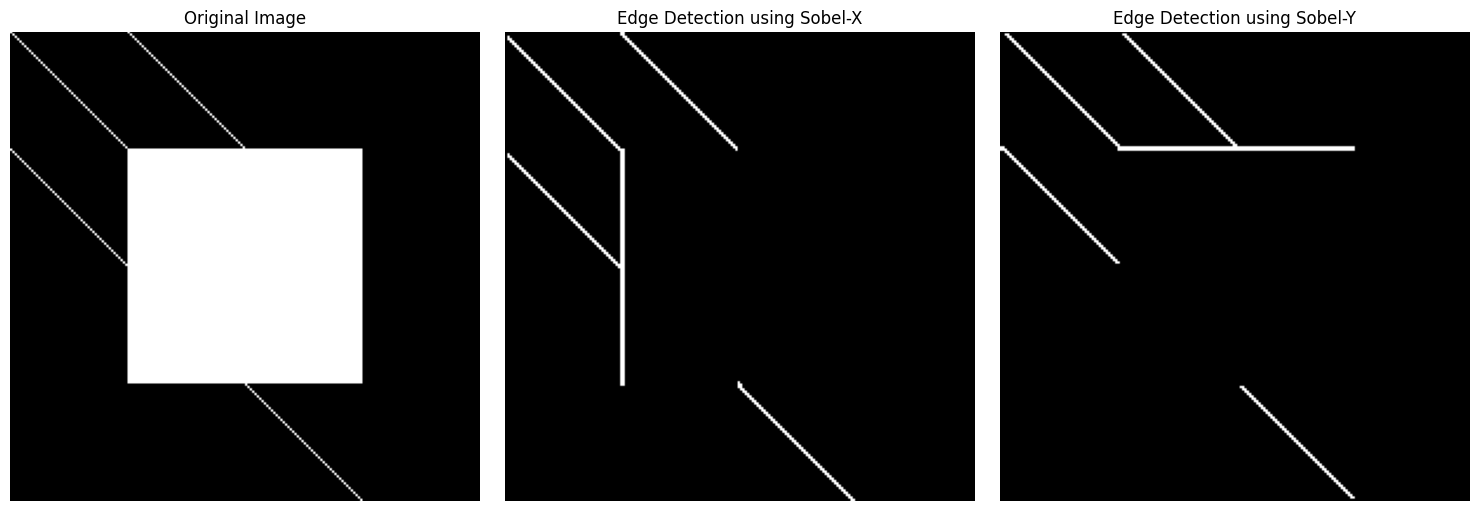

Edge detection complete - all three images displayed


In [3]:
import numpy as np
import cv2
import matplotlib.pyplot as plt


# Task 1: Edge Detection Using Convolution
print("Task 1: Edge Detection Using Sobel Filter")


# Option 1: Load an image if available
# Replace 'sample_image.jpg' with the path to your image
try:
    img = cv2.imread('sample_image.jpg', cv2.IMREAD_GRAYSCALE)

    # Check if image was loaded successfully
    if img is None:
        raise Exception("Image not found or could not be loaded")
except:
    # Option 2: Create a sample image if loading fails
    print("Creating sample image...")
    img = np.zeros((200, 200), dtype=np.uint8)
    # Create a simple square in the middle
    img[50:150, 50:150] = 255
    # Add some diagonal patterns
    for i in range(200):
        if i < 100:
            img[i, i] = 255
            if i+50 < 200:
                img[i, i+50] = 255
        if i+50 < 200:
            img[i+50, i] = 255


# Define Sobel filters as per assignment
sobel_x = np.array([
    [-1, 0, 1],
    [-2, 0, 2],
    [-1, 0, 1]
], dtype=np.float32)


sobel_y = np.array([
    [-1, -2, -1],
    [0, 0, 0],
    [1, 2, 1]
], dtype=np.float32)


# Apply Sobel filters using filter2D from OpenCV
sobel_x_img = cv2.filter2D(img, -1, sobel_x)
sobel_y_img = cv2.filter2D(img, -1, sobel_y)


# Convert to absolute value for better visualization
# (otherwise negative values would be clipped and we'd lose information)
sobel_x_display = np.abs(sobel_x_img)
sobel_y_display = np.abs(sobel_y_img)


# Normalize for better display (optional but helps visualization)
sobel_x_display = cv2.normalize(sobel_x_display, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)
sobel_y_display = cv2.normalize(sobel_y_display, None, 0, 255, cv2.NORM_MINMAX).astype(np.uint8)


# Display the three required images
plt.figure(figsize=(15, 5))


# 1. Original Image
plt.subplot(1, 3, 1)
plt.title('Original Image')
plt.imshow(img, cmap='gray')
plt.axis('off')


# 2. Edge detection using Sobel-X
plt.subplot(1, 3, 2)
plt.title('Edge Detection using Sobel-X')
plt.imshow(sobel_x_display, cmap='gray')
plt.axis('off')


# 3. Edge detection using Sobel-Y
plt.subplot(1, 3, 3)
plt.title('Edge Detection using Sobel-Y')
plt.imshow(sobel_y_display, cmap='gray')
plt.axis('off')


# Adjust layout and show the images
plt.tight_layout()
plt.show()


print("Edge detection complete - all three images displayed")


## **Task 2: Implement Max Pooling and Average Pooling (15 points)**

Write a Python script using TensorFlow/Keras to demonstrate Max Pooling and Average Pooling.

*  Create a random **4x4 matrix** as an input image.

*  Apply a **2x2 Max Pooling** operation.

*  Apply a **2x2 Average Pooling** operation.

*  Print the original matrix, max-pooled matrix, and average-pooled matrix.

**Expected Output:**

*  Pooling Operations on Random 4×4 Matrix
*  Printed original matrix, max pooled matrix, and average pooled matrix.


Task 2: Implement Max Pooling and Average Pooling
Original Matrix (4x4):
[[6 3 7 4]
 [6 9 2 6]
 [7 4 3 7]
 [7 2 5 4]]

Max Pooled Matrix (2x2):
[[9. 7.]
 [7. 7.]]

Average Pooled Matrix (2x2):
[[6.   4.75]
 [5.   4.75]]

Verification with manual implementation:
Manual Max Pooling:
[[9. 7.]
 [7. 7.]]

Manual Average Pooling:
[[6.   4.75]
 [5.   4.75]]


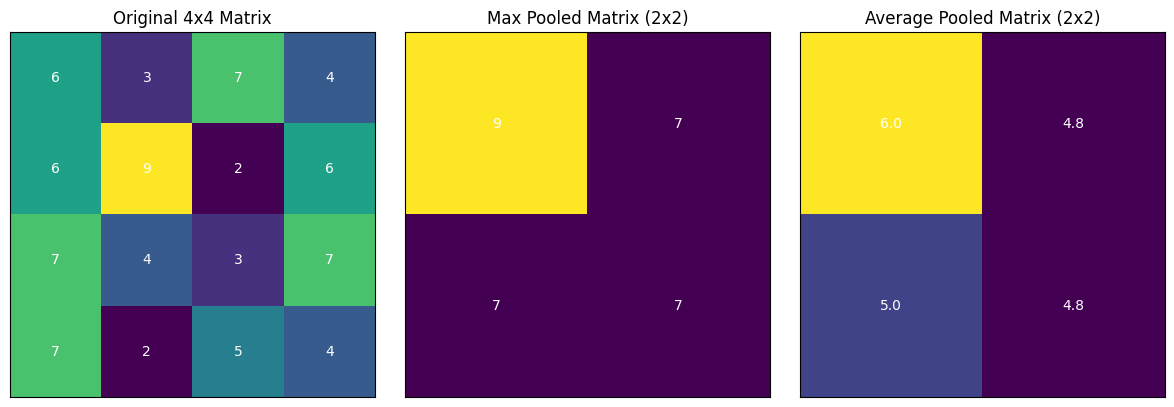

Pooling operations completed successfully


In [5]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
from tensorflow.keras.layers import MaxPool2D, AveragePooling2D

# Task 2: Implement Max Pooling and Average Pooling
print("Task 2: Implement Max Pooling and Average Pooling")

# Set random seed for reproducibility
np.random.seed(42)

# Create a random 4x4 matrix as input image
input_matrix = np.random.randint(0, 10, (4, 4))

# Print the original matrix
print("Original Matrix (4x4):")
print(input_matrix)

# Prepare input for TensorFlow (add batch and channel dimensions)
input_tensor = tf.convert_to_tensor(input_matrix, dtype=tf.float32)
input_tensor = tf.reshape(input_tensor, [1, 4, 4, 1])  # [batch, height, width, channels]

# Create pooling layers
max_pool_layer = MaxPool2D(pool_size=(2, 2), strides=2)
avg_pool_layer = AveragePooling2D(pool_size=(2, 2), strides=2)

# Apply pooling operations
max_pooled = max_pool_layer(input_tensor)
avg_pooled = avg_pool_layer(input_tensor)

# Convert back to numpy arrays and remove extra dimensions
max_pooled_matrix = tf.squeeze(max_pooled).numpy()
avg_pooled_matrix = tf.squeeze(avg_pooled).numpy()

# Print the pooled matrices
print("\nMax Pooled Matrix (2x2):")
print(max_pooled_matrix)

print("\nAverage Pooled Matrix (2x2):")
print(avg_pooled_matrix)

# Optional: Implement manual pooling for educational purposes
def manual_max_pooling(input_arr, pool_size=2, stride=2):
    """
    Manually performs max pooling operation on a 2D array

    Args:
        input_arr: Input 2D array
        pool_size: Size of the pooling window
        stride: Stride for moving the window

    Returns:
        2D array after max pooling
    """
    h, w = input_arr.shape
    # Calculate output dimensions
    out_h = (h - pool_size) // stride + 1
    out_w = (w - pool_size) // stride + 1
    output = np.zeros((out_h, out_w))

    for i in range(out_h):
        for j in range(out_w):
            # Extract the current window
            h_start = i * stride
            h_end = h_start + pool_size
            w_start = j * stride
            w_end = w_start + pool_size
            window = input_arr[h_start:h_end, w_start:w_end]

            # Apply max pooling
            output[i, j] = np.max(window)

    return output

def manual_avg_pooling(input_arr, pool_size=2, stride=2):
    """
    Manually performs average pooling operation on a 2D array

    Args:
        input_arr: Input 2D array
        pool_size: Size of the pooling window
        stride: Stride for moving the window

    Returns:
        2D array after average pooling
    """
    h, w = input_arr.shape
    # Calculate output dimensions
    out_h = (h - pool_size) // stride + 1
    out_w = (w - pool_size) // stride + 1
    output = np.zeros((out_h, out_w))

    for i in range(out_h):
        for j in range(out_w):
            # Extract the current window
            h_start = i * stride
            h_end = h_start + pool_size
            w_start = j * stride
            w_end = w_start + pool_size
            window = input_arr[h_start:h_end, w_start:w_end]

            # Apply average pooling
            output[i, j] = np.mean(window)

    return output

# Verify with manual pooling operations
manual_max_pooled = manual_max_pooling(input_matrix)
manual_avg_pooled = manual_avg_pooling(input_matrix)

# Optional: Print manual results for verification
print("\nVerification with manual implementation:")
print("Manual Max Pooling:")
print(manual_max_pooled)
print("\nManual Average Pooling:")
print(manual_avg_pooled)

# Optional: Visualize the matrices and pooling results
plt.figure(figsize=(12, 4))

# Original matrix
plt.subplot(1, 3, 1)
plt.title('Original 4x4 Matrix')
plt.imshow(input_matrix, cmap='viridis')
for i in range(4):
    for j in range(4):
        plt.text(j, i, str(input_matrix[i, j]), ha='center', va='center', color='white')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])

# Max pooled matrix
plt.subplot(1, 3, 2)
plt.title('Max Pooled Matrix (2x2)')
plt.imshow(max_pooled_matrix, cmap='viridis')
for i in range(2):
    for j in range(2):
        plt.text(j, i, str(int(max_pooled_matrix[i, j])), ha='center', va='center', color='white')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])

# Average pooled matrix
plt.subplot(1, 3, 3)
plt.title('Average Pooled Matrix (2x2)')
plt.imshow(avg_pooled_matrix, cmap='viridis')
for i in range(2):
    for j in range(2):
        plt.text(j, i, f"{avg_pooled_matrix[i, j]:.1f}", ha='center', va='center', color='white')
plt.grid(color='white', linestyle='-', linewidth=2)
plt.xticks([])
plt.yticks([])

plt.tight_layout()
plt.show()

print("Pooling operations completed successfully")

# **Question 4: Implementing and Comparing CNN Architectures (30 points)**
## **Task 1: Implement AlexNet Architecture (15 points)**
Write a Python script using TensorFlow/Keras to implement a simplified AlexNet model with the following layers:

* **Conv2D Layer:** 96 filters, kernel size = (11,11), stride = 4, activation = ReLU
* **MaxPooling Layer:** pool size = (3,3), stride = 2
* **Conv2D Layer:** 256 filters, kernel size = (5,5), activation = ReLU
* **MaxPooling Layer:** pool size = (3,3), stride = 2
* **Conv2D Layer:** 384 filters, kernel size = (3,3), activation = ReLU
* **Conv2D Layer:** 384 filters, kernel size = (3,3), activation = ReLU
* **Conv2D Layer:** 256 filters, kernel size = (3,3), activation = ReLU
* **MaxPooling Layer:** pool size = (3,3), stride = 2
* **Flatten Layer**
* **Fully Connected (Dense) Layer:** 4096 neurons, activation = ReLU
* **Dropout Layer:** 50%
* **Fully Connected (Dense) Layer:** 4096 neurons, activation = ReLU
* **Dropout Layer:** 50%
* **Output Layer:** 10 neurons, activation = Softmax

Print the **model summary** after defining it.


In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
from tensorflow.keras.optimizers import Adam

# Define input shape (you can modify this based on your dataset)
input_shape = (227, 227, 3)  # AlexNet originally used 227x227 RGB images

# Create a simplified AlexNet model
def create_alexnet(input_shape, num_classes=10):
    model = Sequential()

    # First convolutional block
    model.add(Conv2D(96, kernel_size=(11, 11), strides=4, activation='relu',
                     input_shape=input_shape, padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

    # Second convolutional block
    model.add(Conv2D(256, kernel_size=(5, 5), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

    # Third convolutional block
    model.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))

    # Fourth convolutional block
    model.add(Conv2D(384, kernel_size=(3, 3), activation='relu', padding='same'))

    # Fifth convolutional block
    model.add(Conv2D(256, kernel_size=(3, 3), activation='relu', padding='same'))
    model.add(MaxPooling2D(pool_size=(3, 3), strides=2))

    # Fully connected layers
    model.add(Flatten())
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))
    model.add(Dense(4096, activation='relu'))
    model.add(Dropout(0.5))

    # Output layer
    model.add(Dense(num_classes, activation='softmax'))

    return model

# Create the model
alexnet = create_alexnet(input_shape)

# Compile the model
alexnet.compile(optimizer=Adam(),
                loss='categorical_crossentropy',
                metrics=['accuracy'])

# Print model summary
alexnet.summary()



/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 57, 57, 96)          │          34,944 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 28, 28, 96)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 28, 28, 256)         │         614,656 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 13, 13, 256)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 13, 13, 384)         │         885,120 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_3 (Conv2D)                    │ (None, 13, 13, 384)         │       1,327,488 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_4 (Conv2D)                    │ (None, 13, 13, 256)         │         884,992 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 6, 6, 256)           │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 9216)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 4096)                │      37,752,832 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 4096)                │      16,781,312 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 4096)                │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 10)                  │          40,970 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 58,322,314 (222.48 MB)

 Trainable params: 58,322,314 (222.48 MB)

 Non-trainable params: 0 (0.00 B)

## **Task 2: Implement a Residual Block and ResNet (15 points)**

Write a Python script to define a Residual Block and use it to build a simple ResNet-like model.

1. Implement a function residual_block(input_tensor, filters) that:
 * Take an **input tensor**.
 * Applies **two Conv2D layers** (each with 64 filters, kernel size = (3,3), activation = ReLU).
 * Includes a **skip connection** that adds the input tensor to the output before activation.
2. Create a ResNet model that:
 * Uses an **initial Conv2D layer** (64 filters, kernel size = (7,7), stride = 2).
 * Applies **two residual blocks**.
 * Ends with a **Flatten layer, Dense layer (128 neurons), and Output layer (Softmax)**.

Print the **model summary** after defining it.


In [2]:
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Input, Conv2D, BatchNormalization, Activation, Add, MaxPooling2D, Flatten, Dense
from tensorflow.keras.optimizers import Adam

def residual_block(input_tensor, filters):
    """
    Implements a residual block as described in the ResNet paper.

    Args:
        input_tensor: Input tensor to the block
        filters: Number of filters for Conv2D layers

    Returns:
        Output tensor for the residual block
    """
    # First convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(input_tensor)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)

    # Second convolutional layer
    x = Conv2D(filters, kernel_size=(3, 3), padding='same')(x)
    x = BatchNormalization()(x)

    # Skip connection (identity mapping)
    x = Add()([x, input_tensor])

    # Activation after addition
    output = Activation('relu')(x)

    return output

def create_resnet_model(input_shape=(224, 224, 3), num_classes=10):
    """
    Creates a simple ResNet-like model with two residual blocks.

    Args:
        input_shape: Shape of input images
        num_classes: Number of output classes

    Returns:
        ResNet model
    """
    # Input layer
    inputs = Input(shape=input_shape)

    # Initial convolution layer
    x = Conv2D(64, kernel_size=(7, 7), strides=2, padding='same')(inputs)
    x = BatchNormalization()(x)
    x = Activation('relu')(x)
    x = MaxPooling2D(pool_size=(3, 3), strides=2, padding='same')(x)

    # Apply two residual blocks
    x = residual_block(x, 64)
    x = residual_block(x, 64)

    # Global average pooling
    x = Flatten()(x)

    # Dense layer
    x = Dense(128, activation='relu')(x)

    # Output layer
    outputs = Dense(num_classes, activation='softmax')(x)

    # Create model
    model = Model(inputs=inputs, outputs=outputs)

    return model

# Create the model
input_shape = (224, 224, 3)  # Standard input size for ResNet
resnet_model = create_resnet_model(input_shape)

# Compile the model
resnet_model.compile(optimizer=Adam(),
                    loss='categorical_crossentropy',
                    metrics=['accuracy'])

# Print model summary
resnet_model.summary()



Model: "functional_14"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)              ┃ Output Shape           ┃        Param # ┃ Connected to           ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩
│ input_layer_1             │ (None, 224, 224, 3)    │              0 │ -                      │
│ (InputLayer)              │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_5 (Conv2D)         │ (None, 112, 112, 64)   │          9,472 │ input_layer_1[0][0]    │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization       │ (None, 112, 112, 64)   │            256 │ conv2d_5[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation (Activation)   │ (None, 112, 112, 64)   │              0 │ batch_normalization[0… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ max_pooling2d_3           │ (None, 56, 56, 64)     │              0 │ activation[0][0]       │
│ (MaxPooling2D)            │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_6 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_1     │ (None, 56, 56, 64)     │            256 │ conv2d_6[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_1 (Activation) │ (None, 56, 56, 64)     │              0 │ batch_normalization_1… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_7 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ activation_1[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_2     │ (None, 56, 56, 64)     │            256 │ conv2d_7[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ add (Add)                 │ (None, 56, 56, 64)     │              0 │ batch_normalization_2… │
│                           │                        │                │ max_pooling2d_3[0][0]  │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_2 (Activation) │ (None, 56, 56, 64)     │              0 │ add[0][0]              │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_8 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ activation_2[0][0]     │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ batch_normalization_3     │ (None, 56, 56, 64)     │            256 │ conv2d_8[0][0]         │
│ (BatchNormalization)      │                        │                │                        │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ activation_3 (Activation) │ (None, 56, 56, 64)     │              0 │ batch_normalization_3… │
├───────────────────────────┼────────────────────────┼────────────────┼────────────────────────┤
│ conv2d_9 (Conv2D)         │ (None, 56, 56, 64)     │         36,928 │ activation_3[0][0]     │
├──────────────────────

 Total params: 25,849,994 (98.61 MB)

 Trainable params: 25,849,354 (98.61 MB)

 Non-trainable params: 640 (2.50 KB)